In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 

# File to Load 
city_data_to_load = 'city_data.csv'
ride_data_to_load = 'ride_data.csv'

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
#example:combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
city_ride_df= pd.merge(city_data, ride_data, on="city")
# Display the data table for preview
#example:combined_unemployed_data.head()
tot_fare=city_ride_df['fare'].sum()
total_ride=city_ride_df['ride_id'].count()
city_ride_df.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

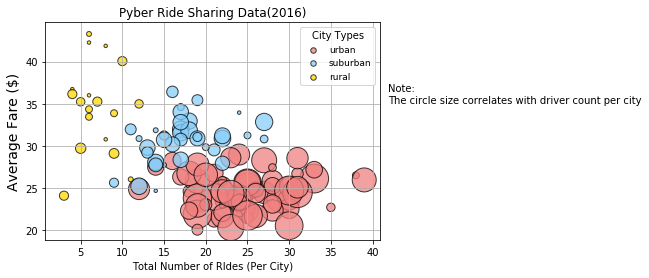

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_type = city_ride_df[city_ride_df["type"] == "Urban"].groupby([city_ride_df["city"]])
suburban_type = city_ride_df[city_ride_df["type"] == "Suburban"].groupby([city_ride_df["city"]])
rural_type = city_ride_df[city_ride_df["type"] == "Rural"].groupby([city_ride_df["city"]])
            
#ride id (x), fare mean(y), driver count mean(s as in size)for each "type"
#example:count_makers = maker_group['maker'].count()
urban_count= urban_type['ride_id'].count() 
urban_mean= urban_type['fare'].mean()
urban_rcmean= urban_type['driver_count'].mean()
            
suburban_count= suburban_type['ride_id'].count() 
suburban_mean= suburban_type['fare'].mean()
suburban_rcmean=suburban_type['driver_count'].mean()

rural_count= rural_type['ride_id'].count() 
rural_mean= rural_type['fare'].mean()
rural_rcmean= rural_type['driver_count'].mean()


#Build the scatter plots for each city types
#type: rural, suburban, urban
#color: gold, light sky blue, light coral
# #example:plt.scatter(x_axis, 'fare', marker="o", facecolors="red", edgecolors="black",
#             #s=x_axis, alpha=0.75; label:)
plt.scatter(urban_count, urban_mean, marker="o", facecolors= 'lightcoral', s =urban_rcmean  * 12, alpha=0.75, label = "urban", edgecolors='black')
plt.scatter(suburban_count, suburban_mean, marker="o", facecolors='lightskyblue', s =suburban_rcmean *12, alpha=0.75, label = "suburban", edgecolors='black')
plt.scatter(rural_count, rural_mean, marker="o", facecolors='gold', s =rural_rcmean * 12, alpha=0.75, label = "rural", edgecolors='black')
plt.grid()

# # # Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of RIdes (Per City)")
plt.ylabel("Average Fare ($)", fontsize = 14)

# # Create a legend
legend = plt.legend(title="City Types",loc="best",fontsize=9)
for l in legend.legendHandles:
      l.set_sizes([30.0])

# # Incorporate a text label regarding circle size
# # #example:annotation('textbox',[.9 .5 .1 .2],'String','Text outside the axes','EdgeColor','none')
note_txt = "Note:\nThe circle size correlates with driver count per city"
plt.gcf().text(0.92,0.6,note_txt,fontsize=10)

# # # Save Figure
# # #example:plt.savefig(x_axis, e_x)
plt.savefig('Pybubbles.png')

# Show plot
plt.show()


## Total Fares by City Type

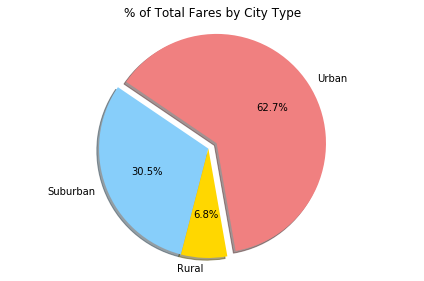

In [4]:
# Calculate Type Percents

urban_sum = urban_type['fare'].sum()
urban_percent = urban_sum.sum() / tot_fare * 100
# urban_percent

suburban_sum = suburban_type['fare'].sum()
suburban_percent = suburban_sum.sum() / tot_fare * 100
# suburban_percent

rural_sum = rural_type['fare'].sum()
rural_percent = rural_sum.sum() / tot_fare * 100
# rural_percent

# Build Pie Chart

#labels
labels= ["Urban", "Suburban", "Rural"]
#sizes
sizes= [urban_percent,suburban_percent,rural_percent]
#colors
colors= ['lightcoral', 'lightskyblue', 'gold']
# Tells matplotlib to seperate the "Python" section from the others
explode=(.09,0,0)
# The values of each section of the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct= '%.1f%%', shadow=True, startangle=-80)

#title
plt.title('% of Total Fares by City Type')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.tight_layout()
plt.savefig("totalfares.png")


## Total Rides by City Type

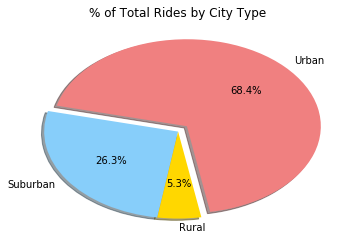

In [5]:
# Calculate Ride Percents
urban_rides_pct= urban_count.sum()/total_ride * 100
#urban_rides_pct

suburban_rides_pct= suburban_count.sum()/total_ride  * 100
#suburban_rides_pct

rural_rides_pct= rural_count.sum()/total_ride * 100
#rural_rides_pct

# Build Pie Chart
rides= [urban_rides_pct,suburban_rides_pct,rural_rides_pct]
plt.pie(rides, explode=explode, colors=colors, labels=labels, autopct= '%.1f%%', shadow=True, startangle=-80)

#title
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("totalrides.png")


## Total Drivers by City Type

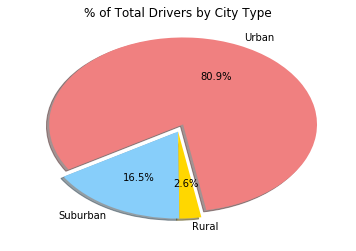

In [6]:
# Calculate Driver Percents
urban_drivers=urban_type['driver_count'].unique().sum()
#urban_drivers[0]

suburban_drivers=suburban_type['driver_count'].unique().sum()
rural_drivers=rural_type['driver_count'].unique().sum()
total_drivers = urban_drivers[0] + suburban_drivers[0] + rural_drivers[0]
total_drivers

urban_dpct= urban_drivers[0]/total_drivers * 100
suburban_dpct= suburban_drivers[0]/total_drivers * 100
rural_dpct= rural_drivers[0]/total_drivers * 100

# Build Pie Charts
drivers=[urban_dpct, suburban_dpct, rural_dpct]
plt.pie(drivers, explode=explode, colors=colors, labels=labels, autopct= '%.1f%%', shadow=True, startangle=-80)

#title
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig("totaldrivers.png")



1. From the "Pyber Ride Sharing Data" graph we see some small plots for the urban city type. These small plots represent a smaller driver count for that city. Though these are urban areas i would think these smaller plots mean this is an area that  may not be traveled by vehicles as much or it isnt heavily populated.
2. The fares in the rural area are the highest of the three types. From experience i know that this is high demand issue. The drivers may charge more for the distance to be traveled and the lesser amount of customers.
3. Its hard to explain why we have so many drivers but not an equal amount of rides. There are fewer rides than drivers. I would say not all drivers are giving rides. They may just be registers as drivers and havent had any customers. 